## 1. A review of statistical terms

### 1.1 Variance & Standard Deviation
Suppose we have a list of widgets. Without using library functions, what is the mean, variance, and standard deviation of this list?

In [18]:
# here's the list.
widgets=[451, 330, 570, 390, 410]

In [19]:
# which libraries should we import here?
import math
import numpy as np
import pandas as pd

In [20]:
# find the mean
total = sum(widgets)
mean_widgets = total/len(widgets)
print("mean widgets: ", mean_widgets)

mean widgets:  430.2


#### Variance

In [21]:
# first write a little function 
def subtract_mean(number):
    return number-mean_widgets

# Note: this can be converted to lambda for efficiency:
lambda x: x-mean_widgets

<function __main__.<lambda>(x)>

In [22]:
# use `map` to apply that function to our list 
distances = list(map(subtract_mean, widgets))

In [23]:
# square and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))

In [24]:
# how long is our list?
list_length=len(squared_distances)-1 # for a sample taken from a population
list_length=len(squared_distances) # for a whole population (no sample)

In [25]:
# calculate variance
variance_widgets = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_widgets,3))

6408.16


#### standard dev

In [26]:
# calculate the standard deviation
print('{:.2f}'.format(math.sqrt(variance_widgets)))
print('{:.2f}'.format(np.sqrt(variance_widgets)))

80.05
80.05


In [27]:
# check our work using numpy
print(np.mean(widgets))
print('{:.2f}'.format(np.var(widgets)))
print('{:.2f}'.format(np.std(widgets)))

430.2
6408.16
80.05


In [28]:
# check our work using pandas
df = pd.DataFrame({"widgets": widgets})
print('mean:', df['widgets'].mean())

mean: 430.2


In [29]:
# for a population
print('var:', '{:.2f}'.format(df['widgets'].var(ddof=0)))
print('std:', '{:.2f}'.format(df['widgets'].std(ddof=0)))

var: 6408.16
std: 80.05


In [30]:
# for a sample
print('var:', '{:.2f}'.format(df['widgets'].var(ddof=1)))
print('std:', '{:.2f}'.format(df['widgets'].std(ddof=1)))

var: 8010.20
std: 89.50


### 1.2 Covariance
Find the covariance between widgets and gadgets. You may use library functions this time.

In [31]:
# make a new list
gadgets = [410, 505, 371, 220, 625]

In [32]:
# using numpy
print('{:.2f}'.format(np.cov(widgets, gadgets)[0][1]))

-2919.05


In [33]:
# using pandas
df['gadgets'] = pd.Series(gadgets)
print('{:.2f}'.format(df.cov().values[0][1]))

-2919.05


### 1.3 Correlation Coefficient 
Find the correlation coefficient that summarizes the relationship between widgets and gadgets. 

In [81]:
# Calculate the standard dev of both lists using pandas.
std_w = df['widgets'].std(ddof=1)
std_g = df['gadgets'].std(ddof=1)
print('{:.4f}'.format(std_w))
print('{:.4f}'.format(std_g))

89.4997
151.2934


In [80]:
# Calculate covariance using pandas
cov_wg = df['widgets'].cov(df['gadgets'])
print('{:.4f}'.format(cov_wg))

-2919.0500


In [71]:
# Calculate the denominator
denom = std_w*std_g

In [77]:
# Calculate correlation
corr_wg = cov_wg/denom
print('{:.6f}'.format(corr_wg))

-0.215576


In [78]:
## Check work using pandas
print('{:.6f}'.format(df['widgets'].corr(df['gadgets'])))

-0.215576


In [73]:
# A shorter way to do this
df.corr()

,widgets,gadgets
widgets,1.000000,-0.215576
gadgets,-0.215576,1.000000


### 1.4 The Variance-Covariance Matrix
Import a dataset of residential properties in Washington DC. Calculate the variance-covariance matrix and correlation matrix for the dataset's numeric columns.

In [86]:
# source: https://www.kaggle.com/christophercorrea/dc-residential-properties/
houses = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/dash-scatterplot-housing/master/dchouses.csv')
houses.head(2)

,BATHRM,HF_BATHRM,KITCHENS,HEAT,AC,ROOMS,PRICE
0,1,1,1.0,Forced Air,Y,6,NaN
1,2,1,1.0,Hot Water Rad,Y,8,460000.0


In [87]:
# calculate the covariance for the entire dataset
houses.cov()

,BATHRM,HF_BATHRM,KITCHENS,ROOMS,PRICE
BATHRM,1.007166,0.125448,0.329582,1.866127e+00,-5.164766e+05
HF_BATHRM,0.125448,0.340972,-0.067744,4.989159e-01,4.109166e+05
KITCHENS,0.329582,-0.067744,0.420696,9.291807e-01,-6.497264e+03
ROOMS,1.866127,0.498916,0.929181,7.218137e+00,-3.030853e+06
PRICE,-516476.554036,410916.625989,-6497.264022,-3.030853e+06,1.551202e+14


In [88]:
# calculate the correlation for the entire dataset
houses.corr()

,BATHRM,HF_BATHRM,KITCHENS,ROOMS,PRICE
BATHRM,1.000000,0.214070,0.461896,0.692115,-0.042109
HF_BATHRM,0.214070,1.000000,-0.173102,0.318021,0.058728
KITCHENS,0.461896,-0.173102,1.000000,0.592760,-0.021364
ROOMS,0.692115,0.318021,0.592760,1.000000,-0.088273
PRICE,-0.042109,0.058728,-0.021364,-0.088273,1.000000


## 2. Orthogonality

### 2.1 Determine orthogonality
Plot two vectors that are orthogonal to each other. 

In [93]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# choose some vectors
vector_1 = [2, 2]
vector_2 = [1, -1]

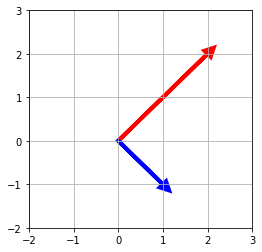

In [135]:
# Set up the figure so that x and y axes are symmetrical.

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)          
plt.ylim(-2,3)

# Plot the vectors
plt.arrow(0,0, vector_1[0], vector_1[1], head_width=.2, head_length=0.2, linewidth=4, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1], head_width=.2, head_length=0.2, linewidth=4, color ='blue')
plt.show()

Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -7 \\ 4  \end{bmatrix}
\qquad
b = \begin{bmatrix}  -5 \\ 3 \end{bmatrix}
\end{align}

In [126]:
# If dot product != 0, then vectors are not orthogonal.
a = np.array([-7,4])
b = np.array([-5,3])
np.dot(a,b)

47

In [132]:
# If dot product = 0, then vectors are orthogonal.
a = np.array([0,4])
b = np.array([-5,0])
np.dot(a,b)

0

In [136]:
# If dot product = 0, then vectors are orthogonal.
np.dot(vector_1,vector_2)

0

## 2.3 Working with Vectors
Suppose we have the following vector:
\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

What is $||c||^2$? 

What is $c \cdot c$? 

What is $c^{T}c$?



In [13]:
import numpy as np

c = np.array([2,-15, 6, 20])
print("c =", c)

print(np.linalg.norm(c)**2)
print(np.dot(c,c))
print(np.matmul(c.T, c))

print("These three statements are equivalent")

c = [  2 -15   6  20]
665.0
665
665
These three statements are equivalent


In [14]:
print(c)

[  2 -15   6  20]


In [15]:
print(c.T)

[  2 -15   6  20]


In [16]:
c_row = np.array([c])
print(c_row)
c_column = c.reshape(-1,1)
print(c_column)

[[  2 -15   6  20]]
[[  2]
 [-15]
 [  6]
 [ 20]]


In [17]:
print(c_row.shape)
print(c_column.shape)

(1, 4)
(4, 1)


In [18]:
np.matmul(c_row, c_column)[0][0]

665

## 3. Unit Vectors

Suppose we have a vector $f$ as follows:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}
Turn vector $f$ into a unit vector.

In [20]:
f = np.array([4,12,11,9,2])
unit_vector = f/np.linalg.norm(f)
print(unit_vector)

# check work
length_of_f = np.linalg.norm(unit_vector)
print(length_of_f)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
0.9999999999999999


## 4. Linear Independence / Dependence 

Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

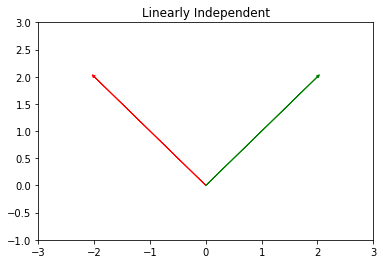

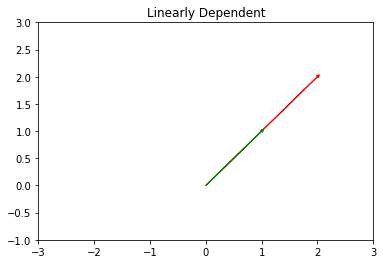

In [21]:
import matplotlib.pyplot as plt

vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Linearly Independent")
plt.show()

vector_1 = [2, 2]
vector_2 = [1, 1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Linearly Dependent")
plt.show()

## 5. Span

What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [24]:
print("since these two vectors are linearly dependent their span is the line that they lie on")
print("they span the line y=(1/2)x")
print("\n They Span the Real Numbers")

since these two vectors are linearly dependent their span is the line that they lie on
they span the line y=(1/2)x

 They Span the Real Numbers


What is the span of the following vectors $l, m, n$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [22]:
# to find the span of these vectors we must first find their rank:
# If we combine these mectors in a matrix whose row space is the above set of vectors 
# and then reduce to row-echelon form. We get the identity matrix

# Because the row-echelon form of the augmented matrix is the identity matrix (which is rank 3) 
# we know that these vectors span R^3

np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

3

## 6. Basis

Graph two vectors that form a basis for $\mathbb{R}^2$



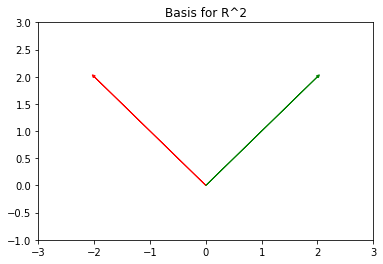

In [23]:
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

What does it mean to form a basis?

In [ ]:
# If two vectors are linearly independent then we know that these vectors can form a linear combination (scaled by some number and then composed together) to form any vector in a certain dimension of space. 

## 7. Rank

What is the Rank of the following matrix, P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [ ]:
# We know from using an online calculator to reduce this matrix to row-echelon 
# form that its row-echelon form is the identity matrix which has 3 pivot values 
# (leading 1s) - therefore its rank is 3. 
import numpy as np

P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
rank = np.linalg.matrix_rank(P)
print(rank)

## 8. Linear Projections

Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

find $proj_{L}(w)$

graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Original Vector
v = [1,3] 
w = [-1,2]

numpy_v = np.array([1,3])
numpy_w = np.array([-1,2])
w_dot_v = np.dot(numpy_v, numpy_w)
v_dot_v = np.dot(numpy_v, numpy_v)
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

# proj = np.multiply(2.4,v)
# x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, projection[0], projection[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')


plt.title("non x-axis projection")
plt.show()

## Stretch Goal

For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

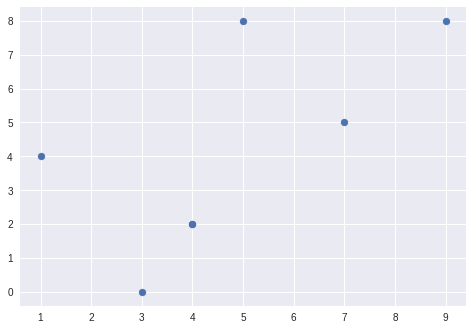

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()